In [1]:
import jieba
import pandas as pd

In [2]:
raw_data = pd.read_csv('train.csv')

In [3]:
raw_data.head()

,content_id,content,subject,sentiment_value,sentiment_word
0,vUXizsqexyZVRdFH,因为森林人即将换代，这套系统没必要装在一款即将换代的车型上，因为肯定会影响价格。,价格,0,影响
1,4QroPd9hNfnCHVt7,四驱价格貌似挺高的，高的可以看齐XC60了，看实车前脸有点违和感。不过大众的车应该不会差。,价格,-1,高
2,QmqJ2AvM5GplaRyz,斯柯达要说质量，似乎比大众要好一点，价格也低一些，用料完全一样。我听说过野帝，但没听说过你说...,价格,1,低
3,KMT1gFJiU4NWrVDn,这玩意都是给有钱任性又不懂车的土豪用的，这价格换一次我妹夫EP020可以换三锅了,价格,-1,有钱任性
4,nVIlGd5yMmc37t1o,17价格忒高，估计也就是14-15左右。,价格,-1,高


In [4]:
word_change = list(raw_data['subject'].value_counts().keys())

In [5]:
word_dict = {}
for i in range(10):
    word_dict[word_change[i]] = i

print(word_dict)

{'动力': 0, '价格': 1, '油耗': 2, '操控': 3, '舒适性': 4, '配置': 5, '安全性': 6, '内饰': 7, '外观': 8, '空间': 9}


In [6]:
# for i,text in enumerate(raw_data['subject']):
#     raw_data['subject'][i] = word_dict[ raw_data['subject'][i] ]

raw_data['subject'] = raw_data['subject'].apply(lambda x: word_dict[x])

In [7]:
raw_data['subject'].head(500)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
470    0
471    0
472    4
473    5
474    3
475    8
476    4
477    2
478    1
479    6
480    6
481    2
482    1
483    2
484    9
485    3
486    8
487    1
488    1
489    8
490    8
491    6
492    0
493    2
494    0
495    4
496    1
497    0
498    1
499    0
Name: subject, Length: 500, dtype: int64

In [8]:
raw_data[497:500]

,content_id,content,subject,sentiment_value,sentiment_word
497,I2Oc8UfrTWj1Zsu5,15年6月以后生产的森林人与傲虎基本上都不烧机油。我也是摩托迷骑川崎小火神与雅马哈巧格，现在...,0,0,NaN
498,NV5nHkQKyTXLdpGU,那这个价格还可以的，一般都是在15万上下,1,0,NaN
499,dqv5zaI1OZeERuwG,这个问题我觉得是这样：在滑行时发动机喷油嘴默认是不喷油的，但是当发动机怠速太低的时候，会恢复...,0,0,NaN


In [9]:
raw_data['content'] = pd.Series([' '.join(jieba.cut(i, cut_all=True)) for i in raw_data['content']])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Kavin\AppData\Local\Temp\jieba.cache
Loading model cost 0.766 seconds.
Prefix dict has been built succesfully.


In [10]:
raw_data['content'].head(5)

0    因为 森林 人 即将 换代   这 套 系统 没 必要 装 在 一款 即将 换代 的 车型 ...
1    四 驱 价格 貌似 挺 高 的   高 的 可以 看齐 XC60 了   看 实 车 前 脸...
2    斯柯达 柯达 要说 质量   似乎 比 大众 要 好 一点   价格 也 低 一些   用料...
3    这 玩意 都 是 给 有钱 任性 又 不 懂 车 的 土豪 用 的   这 价格 换 一次 ...
4                    17 价格 忒 高   估计 也 就是 14 15 左右     
Name: content, dtype: object

In [11]:
raw_data['sentiment_value'].head(2)

0    0
1   -1
Name: sentiment_value, dtype: int64

In [12]:
raw_data.head()

,content_id,content,subject,sentiment_value,sentiment_word
0,vUXizsqexyZVRdFH,因为 森林 人 即将 换代 这 套 系统 没 必要 装 在 一款 即将 换代 的 车型 ...,1,0,影响
1,4QroPd9hNfnCHVt7,四 驱 价格 貌似 挺 高 的 高 的 可以 看齐 XC60 了 看 实 车 前 脸...,1,-1,高
2,QmqJ2AvM5GplaRyz,斯柯达 柯达 要说 质量 似乎 比 大众 要 好 一点 价格 也 低 一些 用料...,1,1,低
3,KMT1gFJiU4NWrVDn,这 玩意 都 是 给 有钱 任性 又 不 懂 车 的 土豪 用 的 这 价格 换 一次 ...,1,-1,有钱任性
4,nVIlGd5yMmc37t1o,17 价格 忒 高 估计 也 就是 14 15 左右,1,-1,高


In [13]:
data = []
label = []

for i in raw_data['content']:
    data.append(i)
    
for j in raw_data['sentiment_value']:
    label.append(j)

print(len(data))
print(len(label))

9947
9947


In [14]:
data[0]

'因为 森林 人 即将 换代   这 套 系统 没 必要 装 在 一款 即将 换代 的 车型 上   因为 肯定 定会 影响 价格  '

In [15]:
label[0]

0

In [16]:
#处理文本为序列的整数列表，制作x，y
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 30
training_sample = 7957
validation_samples = 1990
max_words = 10000
#max_words个单词的文本转数值转换器
tokenizer = Tokenizer(num_words=max_words, lower=False)
tokenizer.fit_on_texts(data)
#将字符串转化为整数索引的列表
sequences = tokenizer.texts_to_sequences(data)#如果model=‘bianry’则是01表示
#获得  字符：数字 的字典
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
#将列表转换为（samples，maxlen）的二维整数张量
data = pad_sequences(sequences, maxlen=maxlen)#maxlen设置最大的序列长度，长于该长度的序列将会截短，短于该长度的序列将会填充
#将结构数据转化为ndarray,一般是引用，不是copy对象
labels = np.asarray(label)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
sequences[0]

Using TensorFlow backend.


Found 16494 unique tokens.
Shape of data tensor: (9947, 30)
Shape of label tensor: (9947,)


[175,
 12,
 8,
 4560,
 657,
 50,
 492,
 339,
 30,
 445,
 200,
 23,
 1116,
 4560,
 657,
 1,
 284,
 64,
 175,
 136,
 1498,
 288,
 24]

In [17]:
word_index

{'的': 1,
 '了': 2,
 '是': 3,
 '我': 4,
 '2': 5,
 '也': 6,
 '就': 7,
 '人': 8,
 '都': 9,
 '车': 10,
 '你': 11,
 '森林': 12,
 '有': 13,
 '不': 14,
 '和': 15,
 '发动': 16,
 '动机': 17,
 '5': 18,
 '发动机': 19,
 '油耗': 20,
 '好': 21,
 '机油': 22,
 '在': 23,
 '价格': 24,
 '动力': 25,
 '可以': 26,
 '就是': 27,
 '没有': 28,
 '比': 29,
 '没': 30,
 '款': 31,
 '换': 32,
 '0': 33,
 '还是': 34,
 '吧': 35,
 '买': 36,
 '要': 37,
 '刹车': 38,
 '还': 39,
 '公里': 40,
 '个': 41,
 '说': 42,
 '这个': 43,
 '高': 44,
 '很': 45,
 '内饰': 46,
 '大': 47,
 '森': 48,
 '不是': 49,
 '这': 50,
 '用': 51,
 '看': 52,
 '感觉': 53,
 '四': 54,
 '烧': 55,
 '问题': 56,
 '多': 57,
 '开': 58,
 '会': 59,
 '什么': 60,
 '驱': 61,
 '空间': 62,
 '操控': 63,
 '上': 64,
 '配置': 65,
 '啊': 66,
 '一个': 67,
 '现在': 68,
 '去': 69,
 '斯巴鲁': 70,
 '巴鲁': 71,
 '如果': 72,
 '但是': 73,
 '高速': 74,
 '油': 75,
 '时': 76,
 '一样': 77,
 '跑': 78,
 '小': 79,
 '低': 80,
 '导航': 81,
 '对': 82,
 '吗': 83,
 '外观': 84,
 '但': 85,
 '不错': 86,
 '比较': 87,
 '那': 88,
 '底盘': 89,
 '觉得': 90,
 '能': 91,
 '变速': 92,
 '空调': 93,
 '过': 94,
 '全': 95,
 '性能': 96,
 '变速箱':

In [18]:
from keras.utils import to_categorical
#对数据进行分割
#先打乱
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
print(labels[:20])

label = []
for i in range(len(labels)):
    if labels[i] == 0:
        label.append([0, 1 , 0])
    elif labels[i] == -1:
        label.append([1, 0, 0])
    elif labels[i] == 1:
        label.append([0, 0, 1])
print(label[:20])
label = np.asarray(label)


x_train = data[:training_sample]
y_train = label[:training_sample]
x_val = data[training_sample: training_sample + validation_samples]
y_val = label[training_sample: training_sample + validation_samples]

[ 0  1  0  0  0  1 -1  0  0  1  0  0  0  0  0  0 -1  0  0 -1]
[[0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0]]


In [19]:
x_train.shape

(7957, 30)

In [20]:
y_train.shape

(7957, 3)

In [21]:
y_train[0]

array([0, 1, 0])

In [27]:
from keras.models import Sequential
from keras import layers

max_words = 10000
embedding_dims = 100
maxlen = 30
filters = 128
kernel_size = 3

right_branch = Sequential()
right_branch.add(layers.Embedding(max_words, embedding_dims, input_length=maxlen))
right_branch.add(layers.Conv1D(filters=filters,
                                    kernel_size=kernel_size,
                                    padding='valid',
                                    activation='relu',
                                     ))
right_branch.add(layers.MaxPooling1D(3))


left_branch = Sequential()
left_branch.add(layers.Embedding(max_words, embedding_dims, input_length=maxlen))
left_branch.add(layers.LSTM(128, return_sequences=True))

merged = layers.Merge([left_branch, right_branch], mode='dot', output_shape=lambda x: x[0])

final_model = Sequential()
final_model.add(merged)
final_model.add(layers.GlobalAveragePooling1D())
final_model.add(layers.Dense(10, activation='softmax'))

final_model.summary()
#right_branch.summary()

#model.add(layers.MaxPooling1D(3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 30, 9)             0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                100       
Total params: 2,155,876
Trainable params: 2,155,876
Non-trainable params: 0
_________________________________________________________________


F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [30]:
final_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = final_model.fit([x_train,x_train], y_train_subject,
                   epochs=100,
                   batch_size=32,
                   validation_data=([x_val,x_val], y_test_subject),
                   #callbacks=callback_list,
                    verbose =1)

Train on 7957 samples, validate on 1990 samples
Epoch 1/100
7957/7957 [==============================] - 15s 2ms/step - loss: 0.7568 - acc: 0.7588 - val_loss: 3.8335 - val_acc: 0.1673
Epoch 2/100
7957/7957 [==============================] - 14s 2ms/step - loss: 0.6977 - acc: 0.7763 - val_loss: 4.0358 - val_acc: 0.1824
Epoch 3/100
7957/7957 [==============================] - 15s 2ms/step - loss: 0.6666 - acc: 0.7836 - val_loss: 3.8526 - val_acc: 0.1281
Epoch 4/100
7957/7957 [==============================] - 15s 2ms/step - loss: 0.6336 - acc: 0.7901 - val_loss: 3.9543 - val_acc: 0.1296
Epoch 5/100
7957/7957 [==============================] - 13s 2ms/step - loss: 0.6102 - acc: 0.7962 - val_loss: 4.2222 - val_acc: 0.1704
Epoch 6/100
7957/7957 [==============================] - 13s 2ms/step - loss: 0.5869 - acc: 0.7985 - val_loss: 4.0655 - val_acc: 0.1367
Epoch 7/100
7957/7957 [==============================] - 13s 2ms/step - loss: 0.5700 - acc: 0.8048 - val_loss: 4.0767 - val_acc: 0.1487


In [22]:
from keras import layers

#【max_words单词， embedding_dims单词对应的维度向量】
embedding_dim = 100


# 定义模型
#【样本，每个样本100单词，每个单词100维度】
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Bidirectional, LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))#构建词嵌入，每个单词
# model.add(layers.Conv1D(32, 5, activation='relu'))
# model.add(layers.MaxPooling1D(3))
model.add(Bidirectional(LSTM(64)))
#model.add(Flatten())
model.add(Dense(32, activation='relu'))#负责单词之间的练习和语义
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 1,088,938
Trainable params: 1,088,938
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.utils import to_categorical

y_train_subject = raw_data['subject'][:training_sample]
y_test_subject = raw_data['subject'][training_sample:]


y_test_subject = to_categorical(y_test_subject, num_classes=10)
y_train_subject = to_categorical(y_train_subject, num_classes=10)

In [24]:
y_train_subject.shape

(7957, 10)

In [25]:
y_test_subject.shape

(1990, 10)

In [26]:




model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train_subject,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_test_subject),
                   #callbacks=callback_list,
                    verbose =1)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 7957 samples, validate on 1990 samples
Epoch 1/10
7957/7957 [==============================] - 28s 3ms/step - loss: 2.1452 - acc: 0.2718 - val_loss: 2.2079 - val_acc: 0.2804
Epoch 2/10
7957/7957 [==============================] - 24s 3ms/step - loss: 2.1083 - acc: 0.2756 - val_loss: 2.2457 - val_acc: 0.2709
Epoch 3/10
7957/7957 [==============================] - 25s 3ms/step - loss: 1.9911 - acc: 0.3133 - val_loss: 2.3263 - val_acc: 0.1628
Epoch 4/10
7957/7957 [==============================] - 25s 3ms/step - loss: 1.8073 - acc: 0.3759 - val_loss: 2.4419 - val_acc: 0.1653
Epoch 5/10
7957/7957 [==============================] - 26s 3ms/step - loss: 1.6118 - acc: 0.4500 - val_loss: 2.5578 - val_acc: 0.1613
Epoch 6/10
7957/7957 [==============================] - 28s 4ms/step - loss: 1.4233 - acc: 0.5198 - val_loss: 3.0715 - val_acc: 0.1613
Epoch 7/10
7957/7957 [==============================] - 25s 3ms/step 

In [25]:
#【样本，每个样本30单词，每个单词100维度】
from keras import layers
from keras.models import Sequential
embedding_dims = 100

# 定义模型
model_1 = Sequential()
model_1.add(layers.Embedding(max_words, embedding_dims, input_length=maxlen))#构建词嵌入，每个单词
model_1.add(layers.LSTM(32,
                      dropout=0.1,
                      recurrent_dropout=0.5,
                      return_sequences=True,
                     ))
model_1.add(layers.LSTM(64,
                     activation='relu',
                      dropout=0.1,
                      recurrent_dropout=0.5,
                     ))
#model.add(layers.Flatten())# 3 -> 2
model_1.add(layers.Dense(32, activation='relu'))#负责单词之间的练习和语义
model_1.add(layers.Dense(3, activation='softmax'))
model_1.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            17024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 1,044,035
Trainable params: 1,044,035
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_1.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model_1.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   callbacks=callback_list,
                    verbose =1)


Train on 7957 samples, validate on 1990 samples
Epoch 1/10
7957/7957 [==============================] - 31s 4ms/step - loss: 0.6872 - acc: 0.7206 - val_loss: 0.7480 - val_acc: 0.7070
Epoch 2/10
7957/7957 [==============================] - 27s 3ms/step - loss: 0.6191 - acc: 0.7577 - val_loss: 0.8277 - val_acc: 0.6271
Epoch 3/10
7957/7957 [==============================] - 27s 3ms/step - loss: 0.5634 - acc: 0.7860 - val_loss: 0.7649 - val_acc: 0.7090
Epoch 4/10
7957/7957 [==============================] - 28s 4ms/step - loss: 0.5095 - acc: 0.8042 - val_loss: 0.8077 - val_acc: 0.6915
Epoch 5/10
7957/7957 [==============================] - 28s 3ms/step - loss: 0.4683 - acc: 0.8242 - val_loss: 0.8504 - val_acc: 0.7211
Epoch 6/10
7957/7957 [==============================] - 28s 3ms/step - loss: 0.4261 - acc: 0.8422 - val_loss: 0.9042 - val_acc: 0.6302
Epoch 7/10
7957/7957 [==============================] - 28s 4ms/step - loss: 0.3897 - acc: 0.8569 - val_loss: 0.8788 - val_acc: 0.7050
Epoch 8

In [29]:
from keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


class Callback(object):
    def __init__(self, model_name):
        self.model_name = model_name
        self.log_dir = "{}_logs/".format(self.model_name)
        self.model_dir = "{}_models/".format(self.model_name)

    def get_tensorboard(self):#是一个可视化的展示器
        tensorboard_callback = TensorBoard(log_dir=self.log_dir, write_grads=True,
                                           histogram_freq=0, write_images=True)
        return tensorboard_callback

    def get_early_stop(self, patience):#当监测值不再改善时，该回调函数将中止训练
        early_stop = EarlyStopping('val_acc', patience=patience)
        return early_stop

    def get_readuce_lr(self, factor, patience):#学习率衰减
        return ReduceLROnPlateau(monitor='val_acc', factor=factor, patience=patience)

    def get_model_ckpt(self):#在每个epoch后保存模型
        model_names = self.model_dir + '.{epoch:02d}-{val_acc:.4f}.h5'
        model_checkpoint = ModelCheckpoint(model_names, monitor='val_acc', verbose=1, save_best_only=True)
        return model_checkpoint



In [30]:
callbacks = Callback('LSTM')
tensorboard = callbacks.get_tensorboard()
early_stop = callbacks.get_early_stop(5)
readuce_lr = callbacks.get_readuce_lr(factor=0.5, patience=50 // 4)
#model_ckpt = callbacks.get_model_ckpt()
callback_list = [tensorboard, early_stop, readuce_lr]

In [26]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   callbacks=callback_list
)


Train on 7957 samples, validate on 1990 samples
Epoch 1/10
7957/7957 [==============================] - 25s 3ms/step - loss: 0.8147 - acc: 0.6692 - val_loss: 0.7670 - val_acc: 0.6960
Epoch 2/10
7957/7957 [==============================] - 23s 3ms/step - loss: 0.7135 - acc: 0.7030 - val_loss: 0.7853 - val_acc: 0.7005
Epoch 3/10
7957/7957 [==============================] - 23s 3ms/step - loss: 0.6324 - acc: 0.7444 - val_loss: 0.7621 - val_acc: 0.7090
Epoch 4/10
7957/7957 [==============================] - 23s 3ms/step - loss: 0.5295 - acc: 0.7939 - val_loss: 0.7568 - val_acc: 0.6980
Epoch 5/10
6560/7957 [=======================>......] - ETA: 3s - loss: 0.4399 - acc: 0.8294

KeyboardInterrupt: 

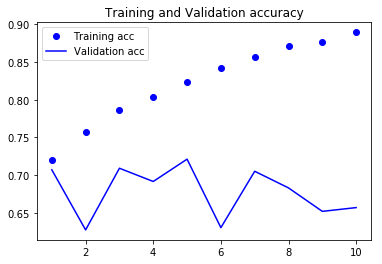

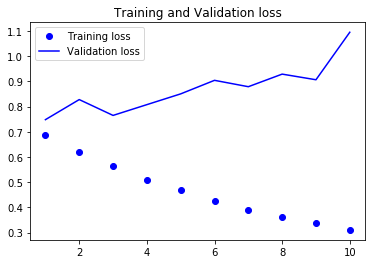

In [38]:
#绘制模型随时间的变化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()#显示图例

plt.figure()#创建窗口

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(LinearSVC(C=1, loss="hinge", random_state=42))
svm_clf.fit(data, labels)

In [7]:
import pandas as pd
compare1 = pd.read_csv('submit_svc.csv')
compare2 = pd.read_csv('submit_logistic.csv')
print(compare1.shape)
print(compare2.shape)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 0: invalid continuation byte